# Polars: A pandas replacement ?

Written in [Rust](https://www.rust-lang.org/), uses [Arrow](https://arrow.apache.org/) (columnar memory format)

Polars popularity: star history of github repos

<img src="images/polars_stars.png" alt = "polars stars" width="50%" height="25%">

Image source: [Pandas 2.0 and its Ecosystem (Arrow, Polars, DuckDB)](https://airbyte.com/blog/pandas-2-0-ecosystem-arrow-polars-duckdb)

#### Basic benchmark question

<img src="images/basic_question.png" alt = "basic question" width="40%" height="20%">

**Query:** "sum v1 by id1": 100 adhoc groups of ~ 10,000,000 rows; result: 100 X 2 

Image source: [Database-like ops benchmark](https://duckdblabs.github.io/db-benchmark/groupby/G1_1e9_1e2_0_0_basic.png)

#### Advanced benchmark question

<img src="images/advanced_question.png" alt = "advanced question" width="40%" height="20%">

**Query:** "median v3 sd v3 by id4 id5": 10,000 adhoc groups of ~ 100,000 rows; result: 10,000 X 4

Image source: [Database-like ops benchmark](https://duckdblabs.github.io/db-benchmark/groupby/G1_1e9_1e2_0_0_advanced.png)



### Conceptual differences between `polars` and `pandas`

Source: [Coming from Pandas](https://pola-rs.github.io/polars/user-guide/migration/pandas/)

#### No row index
> Pandas gives a label to each row with an index. Polars does not use an index and each row is indexed by its integer position in the table.   
>
> Polars aims to have predictable results and readable queries, as such we think an index does not help us reach that objective.
#### More support for parallel operations
> Polars exploits the strong support for concurrency in Rust to run many operations in parallel
#### Lazy evaluation of queries and query optimization
> Eager evaluation : code is evaluated as soon as you run the code.  
> 
> Lazy evaluation : running a line of code means that the underlying logic is added to a query plan rather than being evaluated.
#### In memory data represenation
> ~~Polars represents data in memory with Arrow arrays while Pandas represents data in memory with Numpy arrays~~

Since [release 2.0.0](https://pandas.pydata.org/docs/dev/whatsnew/v2.0.0.html) pandas also include Arrow support 

## [Installation](https://pola-rs.github.io/polars/user-guide/installation/)

```bash .noeval
pip install "polars[numpy, pandas, xlsx2csv]"
```

| Tags | Description |
|:----:|-------------|
| all  |  all optional dependencies |
| pandas  |  pandas to and from conversion |
| numpy  |  numpy to and from conversion |
| xlsx2csv  |  read from Excel files |
| ....|

See here for a [list of all available tags](https://pola-rs.github.io/polars/user-guide/installation/#python)


In [132]:
import os
# os.environ['POLARS_MAX_THREADS'] = '6' # <- if running in a cluster environment
import pandas as pd
import polars as pl

In [133]:
print(f"Pandas version: {pd.__version__}")
print(f"Polars version: {pl.__version__}")

Pandas version: 2.1.2
Polars version: 0.19.12


## Reading data

In [134]:
diamonds_pd = pd.read_csv("data/diamonds.csv")
diamonds_pd.describe()

carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

In [135]:
diamonds_pl = pl.read_csv("data/diamonds.csv")
diamonds_pl.describe()

shape: (9, 11)
┌────────────┬──────────┬───────────┬───────┬───┬─────────────┬──────────┬──────────┬──────────┐
│ describe   ┆ carat    ┆ cut       ┆ color ┆ … ┆ price       ┆ x        ┆ y        ┆ z        │
│ ---        ┆ ---      ┆ ---       ┆ ---   ┆   ┆ ---         ┆ ---      ┆ ---      ┆ ---      │
│ str        ┆ f64      ┆ str       ┆ str   ┆   ┆ f64         ┆ f64      ┆ f64      ┆ f64      │
╞════════════╪══════════╪═══════════╪═══════╪═══╪═════════════╪══════════╪══════════╪══════════╡
│ count      ┆ 53940.0  ┆ 53940     ┆ 53940 ┆ … ┆ 53940.0     ┆ 53940.0  ┆ 53940.0  ┆ 53940.0  │
│ null_count ┆ 0.0      ┆ 0         ┆ 0     ┆ … ┆ 0.0         ┆ 0.0      ┆ 0.0      ┆ 0.0      │
│ mean       ┆ 0.79794  ┆ null      ┆ null  ┆ … ┆ 3932.799722 ┆ 5.731157 ┆ 5.734526 ┆ 3.538734 │
│ std        ┆ 0.474011 ┆ null      ┆ null  ┆ … ┆ 3989.439738 ┆ 1.121761 ┆ 1.142135 ┆ 0.705699 │
│ min        ┆ 0.2      ┆ Fair      ┆ D     ┆ … ┆ 326.0       ┆ 0.0      ┆ 0.0      ┆ 0.0      │
│ 25%        ┆ 0.4      ┆ null      ┆ null  ┆ … ┆ 950.0       ┆ 4.71     ┆ 4.72     ┆ 2.91     │
│ 50%        ┆ 0.7      ┆ null      ┆ null  ┆ … ┆ 2401.0      ┆ 5.7      ┆ 5.71     ┆ 3.53     │
│ 75%        ┆ 1.04     ┆ null      ┆ null  ┆ … ┆ 5325.0      ┆ 6.54     ┆ 6.54     ┆ 4.04     │
│ max        ┆ 5.01     ┆ Very Good ┆ J     ┆ … ┆ 18823.0     ┆ 10.74    ┆ 58.9     ┆ 31.8     │
└────────────┴──────────┴───────────┴───────┴───┴─────────────┴──────────┴──────────┴──────────┘

In [136]:
diamonds_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [137]:
diamonds_pl.glimpse()

Rows: 53940
Columns: 10
$ carat   <f64> 0.23, 0.21, 0.23, 0.29, 0.31, 0.24, 0.24, 0.26, 0.22, 0.23
$ cut     <str> 'Ideal', 'Premium', 'Good', 'Premium', 'Good', 'Very Good', 'Very Good', 'Very Good', 'Fair', 'Very Good'
$ color   <str> 'E', 'E', 'E', 'I', 'J', 'J', 'I', 'H', 'E', 'H'
$ clarity <str> 'SI2', 'SI1', 'VS1', 'VS2', 'SI2', 'VVS2', 'VVS1', 'SI1', 'VS2', 'VS1'
$ depth   <f64> 61.5, 59.8, 56.9, 62.4, 63.3, 62.8, 62.3, 61.9, 65.1, 59.4
$ table   <f64> 55.0, 61.0, 65.0, 58.0, 58.0, 57.0, 57.0, 55.0, 61.0, 61.0
$ price   <i64> 326, 326, 327, 334, 335, 336, 336, 337, 337, 338
$ x       <f64> 3.95, 3.89, 4.05, 4.2, 4.34, 3.94, 3.95, 4.07, 3.87, 4.0
$ y       <f64> 3.98, 3.84, 4.07, 4.23, 4.35, 3.96, 3.98, 4.11, 3.78, 4.05
$ z       <f64> 2.43, 2.31, 2.31, 2.63, 2.75, 2.48, 2.47, 2.53, 2.49, 2.39



### Memory usage

#### pandas info

>... a memory estimation is made based in column dtype and number of rows assuming values consume the same memory amount for corresponding dtypes

In [138]:
diamonds_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


> ...With deep memory introspection, a real memory usage calculation is performed at the cost of computational resources
>
> ...`memory_usage="deep"` will enable a more accurate memory usage report, accounting for the full usage of the contained objects.

In [139]:
diamonds_pd.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 12.2 MB


#### polars estimated_size

> ...is the sum of the size of its buffers, validity, including nested arrays.

In [140]:
diamonds_pl.estimated_size(unit="mb")

4.650371551513672

### Lazy read
Process large datasets stored in file(s) without reading the entire data into memory


In [141]:
diamonds_lazy_pl = pl.scan_csv("data/diamonds.csv")
type(diamonds_lazy_pl)

polars.lazyframe.frame.LazyFrame

In [142]:
diamonds_lazy_pl.fetch(10)
# Collect a small number of rows for debugging

shape: (10, 10)
┌───────┬───────────┬───────┬─────────┬───┬───────┬──────┬──────┬──────┐
│ carat ┆ cut       ┆ color ┆ clarity ┆ … ┆ price ┆ x    ┆ y    ┆ z    │
│ ---   ┆ ---       ┆ ---   ┆ ---     ┆   ┆ ---   ┆ ---  ┆ ---  ┆ ---  │
│ f64   ┆ str       ┆ str   ┆ str     ┆   ┆ i64   ┆ f64  ┆ f64  ┆ f64  │
╞═══════╪═══════════╪═══════╪═════════╪═══╪═══════╪══════╪══════╪══════╡
│ 0.23  ┆ Ideal     ┆ E     ┆ SI2     ┆ … ┆ 326   ┆ 3.95 ┆ 3.98 ┆ 2.43 │
│ 0.21  ┆ Premium   ┆ E     ┆ SI1     ┆ … ┆ 326   ┆ 3.89 ┆ 3.84 ┆ 2.31 │
│ 0.23  ┆ Good      ┆ E     ┆ VS1     ┆ … ┆ 327   ┆ 4.05 ┆ 4.07 ┆ 2.31 │
│ 0.29  ┆ Premium   ┆ I     ┆ VS2     ┆ … ┆ 334   ┆ 4.2  ┆ 4.23 ┆ 2.63 │
│ …     ┆ …         ┆ …     ┆ …       ┆ … ┆ …     ┆ …    ┆ …    ┆ …    │
│ 0.24  ┆ Very Good ┆ I     ┆ VVS1    ┆ … ┆ 336   ┆ 3.95 ┆ 3.98 ┆ 2.47 │
│ 0.26  ┆ Very Good ┆ H     ┆ SI1     ┆ … ┆ 337   ┆ 4.07 ┆ 4.11 ┆ 2.53 │
│ 0.22  ┆ Fair      ┆ E     ┆ VS2     ┆ … ┆ 337   ┆ 3.87 ┆ 3.78 ┆ 2.49 │
│ 0.23  ┆ Very Good ┆ H     ┆ VS1     ┆ … ┆ 338   ┆ 4.0  ┆ 4.05 ┆ 2.39 │
└───────┴───────────┴───────┴─────────┴───┴───────┴──────┴──────┴──────┘

### To numpy and pandas

In [143]:
diamonds_pl.to_numpy()

array([[0.23, 'Ideal', 'E', ..., 3.95, 3.98, 2.43],
       [0.21, 'Premium', 'E', ..., 3.89, 3.84, 2.31],
       [0.23, 'Good', 'E', ..., 4.05, 4.07, 2.31],
       ...,
       [0.7, 'Very Good', 'D', ..., 5.66, 5.68, 3.56],
       [0.86, 'Premium', 'H', ..., 6.15, 6.12, 3.74],
       [0.75, 'Ideal', 'D', ..., 5.83, 5.87, 3.64]], dtype=object)

In [144]:
diamonds_pl.to_pandas() # <- requires pyarrow package

carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]

### Data selection

In [145]:
diamonds_pd.loc[:6,["cut","price"]]

cut  price
0      Ideal    326
1    Premium    326
2       Good    327
3    Premium    334
4       Good    335
5  Very Good    336
6  Very Good    336

In [146]:
diamonds_pl[:6,["cut","price"]]

shape: (6, 2)
┌───────────┬───────┐
│ cut       ┆ price │
│ ---       ┆ ---   │
│ str       ┆ i64   │
╞═══════════╪═══════╡
│ Ideal     ┆ 326   │
│ Premium   ┆ 326   │
│ Good      ┆ 327   │
│ Premium   ┆ 334   │
│ Good      ┆ 335   │
│ Very Good ┆ 336   │
└───────────┴───────┘

## Data wrangling



### [Contexts](https://pola-rs.github.io/polars/user-guide/concepts/contexts/) and [Expressions](https://pola-rs.github.io/polars/user-guide/concepts/expressions/)

Polars' own Domain Specific Language (DSL) for transforming data.

**Context**: refers to context in which an expression needs to be evaluated
- Selection : `df.select([..])`, `df.with_columns([..])`

- Filtering : `df.filter()`

- Group by / Aggregation : `df.group_by(..).agg([..])`

**Expressions**: computations/transformations on data columns
- List of [polars expressions](https://pola-rs.github.io/polars/py-polars/html/reference/expressions/index.html)

### Adding columns
using `with_columns`

In [147]:
diamonds_pl.with_columns(
    price_per_carat = pl.col("price")/pl.col("carat")
).head(6)

shape: (6, 11)
┌───────┬───────────┬───────┬─────────┬───┬──────┬──────┬──────┬─────────────────┐
│ carat ┆ cut       ┆ color ┆ clarity ┆ … ┆ x    ┆ y    ┆ z    ┆ price_per_carat │
│ ---   ┆ ---       ┆ ---   ┆ ---     ┆   ┆ ---  ┆ ---  ┆ ---  ┆ ---             │
│ f64   ┆ str       ┆ str   ┆ str     ┆   ┆ f64  ┆ f64  ┆ f64  ┆ f64             │
╞═══════╪═══════════╪═══════╪═════════╪═══╪══════╪══════╪══════╪═════════════════╡
│ 0.23  ┆ Ideal     ┆ E     ┆ SI2     ┆ … ┆ 3.95 ┆ 3.98 ┆ 2.43 ┆ 1417.391304     │
│ 0.21  ┆ Premium   ┆ E     ┆ SI1     ┆ … ┆ 3.89 ┆ 3.84 ┆ 2.31 ┆ 1552.380952     │
│ 0.23  ┆ Good      ┆ E     ┆ VS1     ┆ … ┆ 4.05 ┆ 4.07 ┆ 2.31 ┆ 1421.73913      │
│ 0.29  ┆ Premium   ┆ I     ┆ VS2     ┆ … ┆ 4.2  ┆ 4.23 ┆ 2.63 ┆ 1151.724138     │
│ 0.31  ┆ Good      ┆ J     ┆ SI2     ┆ … ┆ 4.34 ┆ 4.35 ┆ 2.75 ┆ 1080.645161     │
│ 0.24  ┆ Very Good ┆ J     ┆ VVS2    ┆ … ┆ 3.94 ┆ 3.96 ┆ 2.48 ┆ 1400.0          │
└───────┴───────────┴───────┴─────────┴───┴──────┴──────┴──────┴─────────────────┘

### Data wrangling in pandas vs polars

- Group by `cut`
- compute number of elements in each `cut` category  
- Calculate mean of `carat` and `price` columns   
- List unique elements of `color` and `clarity`

### pandas

In [148]:
diamonds_pd_stats = (diamonds_pd[["carat","cut","color","clarity","price"]]
                     .groupby("cut")
                     .agg(
                        n_items = ("cut","count"),
                        carat_mean = ("carat","mean"),
                        price_mean = ("price","mean"),
                        color_uniq = ("color","unique"),
                        clarity_uniq = ("clarity","unique"),
                        )
                     .sort_values("price_mean",ascending = False)
                     )
diamonds_pd_stats

n_items  carat_mean   price_mean             color_uniq  \
cut                                                                  
Premium      13791    0.891955  4584.257704  [E, I, F, D, J, G, H]   
Fair          1610    1.046137  4358.757764  [E, F, H, G, J, I, D]   
Very Good    12082    0.806381  3981.759891  [J, I, H, E, G, D, F]   
Good          4906    0.849185  3928.864452  [E, J, I, F, H, D, G]   
Ideal        21551    0.702837  3457.541970  [E, J, I, G, D, F, H]   

                                       clarity_uniq  
cut                                                  
Premium    [SI1, VS2, SI2, I1, VS1, VVS1, VVS2, IF]  
Fair       [VS2, SI2, SI1, I1, VVS1, VS1, IF, VVS2]  
Very Good  [VVS2, VVS1, SI1, VS1, VS2, SI2, I1, IF]  
Good       [VS1, SI2, SI1, VS2, VVS1, VVS2, I1, IF]  
Ideal      [SI2, VS1, SI1, VVS2, VVS1, VS2, IF, I1]

### polars

In [171]:
diamonds_pl_stats = (diamonds_pl
                     .select(["carat","cut","color","clarity","price"])
                     .group_by("cut")
                     .agg(
                        n_items = pl.count("cut"),
                        carat_mean = pl.mean("carat"),
                        price_mean = pl.mean("price"),
                        color_uniq = pl.col("color").unique(), # <- not like the others
                        clarity_uniq = pl.col("clarity").unique(),
                        )
                     .sort("price_mean",descending = True))
diamonds_pl_stats

shape: (5, 6)
┌───────────┬─────────┬────────────┬─────────────┬───────────────────┬──────────────────────────┐
│ cut       ┆ n_items ┆ carat_mean ┆ price_mean  ┆ color_uniq        ┆ clarity_uniq             │
│ ---       ┆ ---     ┆ ---        ┆ ---         ┆ ---               ┆ ---                      │
│ str       ┆ u32     ┆ f64        ┆ f64         ┆ list[str]         ┆ list[str]                │
╞═══════════╪═════════╪════════════╪═════════════╪═══════════════════╪══════════════════════════╡
│ Premium   ┆ 13791   ┆ 0.891955   ┆ 4584.257704 ┆ ["J", "E", … "H"] ┆ ["I1", "VVS1", … "SI1"]  │
│ Fair      ┆ 1610    ┆ 1.046137   ┆ 4358.757764 ┆ ["H", "E", … "D"] ┆ ["SI1", "I1", … "IF"]    │
│ Very Good ┆ 12082   ┆ 0.806381   ┆ 3981.759891 ┆ ["I", "J", … "H"] ┆ ["I1", "VVS2", … "VVS1"] │
│ Good      ┆ 4906    ┆ 0.849185   ┆ 3928.864452 ┆ ["F", "J", … "G"] ┆ ["VS2", "SI1", … "I1"]   │
│ Ideal     ┆ 21551   ┆ 0.702837   ┆ 3457.54197  ┆ ["E", "F", … "H"] ┆ ["SI2", "SI1", … "VVS1"] │
└───────────┴─────────┴────────────┴─────────────┴───────────────────┴──────────────────────────┘

In [150]:
diamonds_pd_stats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, Premium to Ideal
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   n_items       5 non-null      int64  
 1   carat_mean    5 non-null      float64
 2   price_mean    5 non-null      float64
 3   color_uniq    5 non-null      object 
 4   clarity_uniq  5 non-null      object 
dtypes: float64(2), int64(1), object(2)
memory usage: 240.0+ bytes


In [151]:
diamonds_pl_stats.glimpse()

Rows: 5
Columns: 6
$ cut                <str> 'Premium', 'Fair', 'Very Good', 'Good', 'Ideal'
$ n_items            <u32> 13791, 1610, 12082, 4906, 21551
$ carat_mean         <f64> 0.8919548981219524, 1.0461366459627353, 0.8063813938089939, 0.8491846718304211, 0.7028369913228676
$ price_mean         <f64> 4584.2577042999055, 4358.757763975155, 3981.7598907465654, 3928.864451691806, 3457.541970210199
$ color_uniq   <list[str]> ['D', 'G', 'F', 'E', 'I', 'J', 'H'], ['I', 'J', 'D', 'E', 'F', 'H', 'G'], ['F', 'H', 'G', 'J', 'E', 'I', 'D'], ['J', 'D', 'E', 'G', 'F', 'H', 'I'], ['G', 'J', 'D', 'H', 'E', 'I', 'F']
$ clarity_uniq <list[str]> ['VS1', 'SI2', 'VVS1', 'VVS2', 'VS2', 'SI1', 'IF', 'I1'], ['SI2', 'VVS2', 'VVS1', 'SI1', 'I1', 'IF', 'VS1', 'VS2'], ['SI1', 'VS2', 'I1', 'VS1', 'SI2', 'IF', 'VVS2', 'VVS1'], ['VVS2', 'VS1', 'SI1', 'SI2', 'I1', 'VVS1', 'VS2', 'IF'], ['VS2', 'SI2', 'VS1', 'SI1', 'VVS1', 'IF', 'VVS2', 'I1']



### [Lazy API](https://pola-rs.github.io/polars/user-guide/lazy/using/)

Polars doesn't run each query line-by-line but instead processes the full query end-to-end:
- allows Polars to apply automatic query optimization with the query optimizer

- can work with larger than memory datasets using streaming <span style="color: red;">(in alpha)</span>

- can catch schema errors before processing the data

In [152]:
lazy_wrangle = (pl.scan_csv("data/diamonds.csv")
                .select(["carat","cut","color","clarity","price"])
                .group_by("cut")
                .agg(
                    n_items = pl.count("cut"),
                    carat_mean = pl.mean("carat"),
                    price_mean = pl.mean("price"),
                    color_uniq = pl.col("color").unique(), 
                    clarity_uniq = pl.col("clarity").unique(),
                    )
                .sort("price_mean",descending = True))
print(type(lazy_wrangle))

<class 'polars.lazyframe.frame.LazyFrame'>


[`LazyFrame`](https://pola-rs.github.io/polars/py-polars/html/reference/lazyframe/index.html): representation of a lazy computation graph/query against a DataFrame

Allows for whole query optimization and parallelism. In Polars this is the preferred and also the highest-performance mode of operation

### Lazy api query optimization

#### unoptimized query

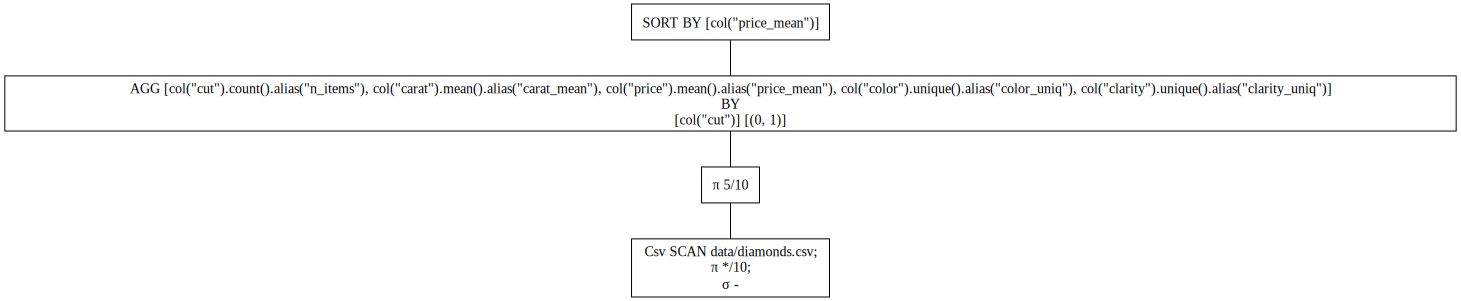

In [153]:
# requires graphviz installed
lazy_wrangle.show_graph(optimized=False) 

#### optimized query

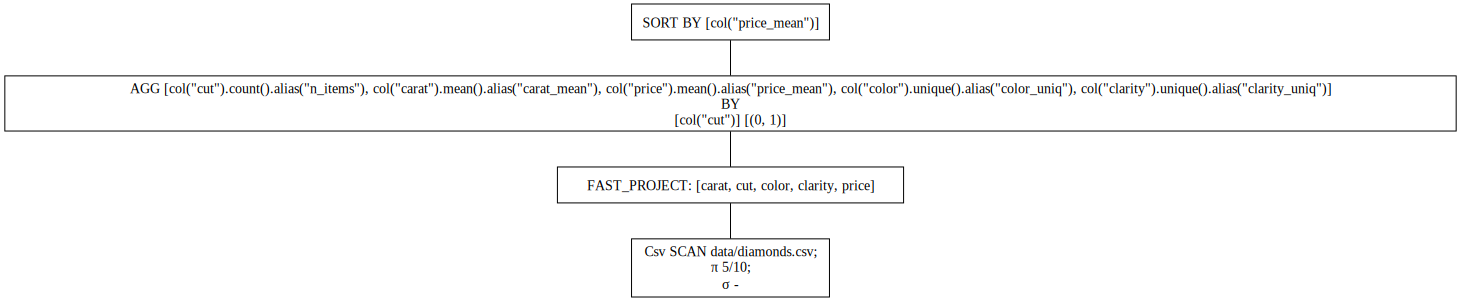

In [154]:
lazy_wrangle.show_graph(optimized=True) # <- default behavior

#### without manual column selection

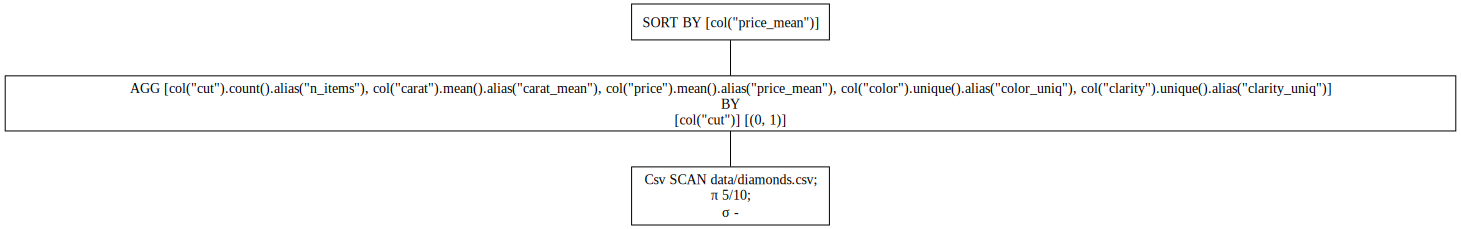

In [155]:
(pl.scan_csv("data/diamonds.csv")
    # .select(["carat","cut","color","clarity","price"]) # <- without select
    .group_by("cut")
    .agg(
        n_items = pl.count("cut"),
        carat_mean = pl.mean("carat"),
        price_mean = pl.mean("price"),
        color_uniq = pl.col("color").unique(), 
        clarity_uniq = pl.col("clarity").unique(),
        )
    .sort("price_mean",descending = True)).show_graph()    

In [156]:
diamonds_lazy_stats = lazy_wrangle.collect() # <-  LazyFrame into a DataFrame.
diamonds_lazy_stats

shape: (5, 6)
┌───────────┬─────────┬────────────┬─────────────┬───────────────────┬─────────────────────────┐
│ cut       ┆ n_items ┆ carat_mean ┆ price_mean  ┆ color_uniq        ┆ clarity_uniq            │
│ ---       ┆ ---     ┆ ---        ┆ ---         ┆ ---               ┆ ---                     │
│ str       ┆ u32     ┆ f64        ┆ f64         ┆ list[str]         ┆ list[str]               │
╞═══════════╪═════════╪════════════╪═════════════╪═══════════════════╪═════════════════════════╡
│ Premium   ┆ 13791   ┆ 0.891955   ┆ 4584.257704 ┆ ["D", "H", … "J"] ┆ ["SI2", "IF", … "VS2"]  │
│ Fair      ┆ 1610    ┆ 1.046137   ┆ 4358.757764 ┆ ["E", "J", … "I"] ┆ ["VS2", "VS1", … "I1"]  │
│ Very Good ┆ 12082   ┆ 0.806381   ┆ 3981.759891 ┆ ["G", "D", … "I"] ┆ ["SI1", "VS1", … "I1"]  │
│ Good      ┆ 4906    ┆ 0.849185   ┆ 3928.864452 ┆ ["I", "D", … "F"] ┆ ["I1", "VS1", … "SI2"]  │
│ Ideal     ┆ 21551   ┆ 0.702837   ┆ 3457.54197  ┆ ["I", "H", … "E"] ┆ ["VVS1", "IF", … "VS2"] │
└───────────┴─────────┴────────────┴─────────────┴───────────────────┴─────────────────────────┘

### [Partial execution](https://pola-rs.github.io/polars/user-guide/lazy/execution/#execution-on-larger-than-memory-data)

Performing queries on data subset

> The `.fetch` method takes a parameter `n_rows` and tries to 'fetch' that number of rows at the data source.
>
>The number of rows cannot be guaranteed, however, as the lazy API does not count how many rows there are at each stage of the query.

In [184]:
(pl.scan_csv("data/diamonds.csv")
    .group_by("cut")
    .agg(
        n_items = pl.count("cut"),
        carat_mean = pl.mean("carat"),
        price_mean = pl.mean("price"),
        color_uniq = pl.col("color").unique(), 
        clarity_uniq = pl.col("clarity").unique(),
        )
    .sort("price_mean",descending = True)
    .fetch(n_rows=100))

shape: (5, 6)
┌───────────┬─────────┬────────────┬────────────┬───────────────────┬──────────────────────────┐
│ cut       ┆ n_items ┆ carat_mean ┆ price_mean ┆ color_uniq        ┆ clarity_uniq             │
│ ---       ┆ ---     ┆ ---        ┆ ---        ┆ ---               ┆ ---                      │
│ str       ┆ u32     ┆ f64        ┆ f64        ┆ list[str]         ┆ list[str]                │
╞═══════════╪═════════╪════════════╪════════════╪═══════════════════╪══════════════════════════╡
│ Fair      ┆ 3       ┆ 0.68       ┆ 1951.0     ┆ ["E", "F"]        ┆ ["VS2", "SI2"]           │
│ Ideal     ┆ 19      ┆ 0.342105   ┆ 692.842105 ┆ ["I", "J", … "D"] ┆ ["VVS1", "SI2", … "SI1"] │
│ Good      ┆ 18      ┆ 0.329444   ┆ 661.277778 ┆ ["E", "H", … "J"] ┆ ["VS1", "VS2", … "VVS1"] │
│ Very Good ┆ 38      ┆ 0.298421   ┆ 610.210526 ┆ ["I", "D", … "F"] ┆ ["SI2", "SI1", … "VS2"]  │
│ Premium   ┆ 22      ┆ 0.293636   ┆ 568.681818 ┆ ["D", "I", … "E"] ┆ ["VS2", "SI1", … "VVS1"] │
└───────────┴─────────┴────────────┴────────────┴───────────────────┴──────────────────────────┘

## [when](https://pola-rs.github.io/polars/py-polars/html/reference/expressions/api/polars.when.html)

`when-then-otherwise` expression

similar to `if...elif...else` blocks

In [193]:
(diamonds_pl
.with_columns([
   pl.when(pl.col("price")>2500)
   .then(pl.lit("overpriced"))
   .when(pl.col("price")<500)
   .then(pl.lit("bargain"))
   .otherwise(pl.lit("may be fair"))
   .alias("price_status")
])).sample(15)

shape: (15, 11)
┌───────┬───────────┬───────┬─────────┬───┬──────┬──────┬──────┬──────────────┐
│ carat ┆ cut       ┆ color ┆ clarity ┆ … ┆ x    ┆ y    ┆ z    ┆ price_status │
│ ---   ┆ ---       ┆ ---   ┆ ---     ┆   ┆ ---  ┆ ---  ┆ ---  ┆ ---          │
│ f64   ┆ str       ┆ str   ┆ str     ┆   ┆ f64  ┆ f64  ┆ f64  ┆ str          │
╞═══════╪═══════════╪═══════╪═════════╪═══╪══════╪══════╪══════╪══════════════╡
│ 0.65  ┆ Ideal     ┆ H     ┆ VVS2    ┆ … ┆ 5.56 ┆ 5.6  ┆ 3.44 ┆ may be fair  │
│ 0.8   ┆ Premium   ┆ H     ┆ SI1     ┆ … ┆ 5.96 ┆ 5.91 ┆ 3.71 ┆ overpriced   │
│ 1.11  ┆ Good      ┆ E     ┆ SI2     ┆ … ┆ 6.76 ┆ 6.83 ┆ 3.96 ┆ overpriced   │
│ 0.36  ┆ Very Good ┆ G     ┆ VS1     ┆ … ┆ 4.63 ┆ 4.65 ┆ 2.85 ┆ may be fair  │
│ …     ┆ …         ┆ …     ┆ …       ┆ … ┆ …    ┆ …    ┆ …    ┆ …            │
│ 0.33  ┆ Very Good ┆ I     ┆ SI1     ┆ … ┆ 4.46 ┆ 4.5  ┆ 2.75 ┆ bargain      │
│ 1.52  ┆ Very Good ┆ I     ┆ VS1     ┆ … ┆ 7.27 ┆ 7.31 ┆ 4.59 ┆ overpriced   │
│ 0.34  ┆ Ideal     ┆ D     ┆ IF      ┆ … ┆ 4.57 ┆ 4.59 ┆ 2.74 ┆ may be fair  │
│ 0.72  ┆ Ideal     ┆ G     ┆ VS1     ┆ … ┆ 5.71 ┆ 5.74 ┆ 3.57 ┆ overpriced   │
└───────┴───────────┴───────┴─────────┴───┴──────┴──────┴──────┴──────────────┘

## [pipe](https://pola-rs.github.io/polars/py-polars/html/reference/dataframe/api/polars.DataFrame.pipe.html#polars.DataFrame.pipe)

similar to [pandas pipe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pipe.html)

> a structured way to apply a sequence of user-defined functions (UDFs)

**Note**  
> It is recommended to use LazyFrame when piping operations, in order to fully take advantage of query optimization and parallelization

In [159]:
def compute_mean_n_uniq(diamonds):
    return(
        diamonds
        .select(["carat","cut","color","clarity","price"])
        .group_by("cut")
        .agg(
            n_items = pl.count("cut"),
            carat_mean = pl.mean("carat"),
            price_mean = pl.mean("price"),
            color_uniq = pl.col("color").unique(), 
            clarity_uniq = pl.col("clarity").unique(),
            )
        .sort("price_mean",descending = True) 
    )

In [160]:
diamonds_pl.pipe(compute_mean_n_uniq)

shape: (5, 6)
┌───────────┬─────────┬────────────┬─────────────┬───────────────────┬──────────────────────────┐
│ cut       ┆ n_items ┆ carat_mean ┆ price_mean  ┆ color_uniq        ┆ clarity_uniq             │
│ ---       ┆ ---     ┆ ---        ┆ ---         ┆ ---               ┆ ---                      │
│ str       ┆ u32     ┆ f64        ┆ f64         ┆ list[str]         ┆ list[str]                │
╞═══════════╪═════════╪════════════╪═════════════╪═══════════════════╪══════════════════════════╡
│ Premium   ┆ 13791   ┆ 0.891955   ┆ 4584.257704 ┆ ["J", "H", … "E"] ┆ ["IF", "SI1", … "SI2"]   │
│ Fair      ┆ 1610    ┆ 1.046137   ┆ 4358.757764 ┆ ["F", "H", … "J"] ┆ ["SI1", "VVS2", … "VS2"] │
│ Very Good ┆ 12082   ┆ 0.806381   ┆ 3981.759891 ┆ ["E", "I", … "D"] ┆ ["IF", "SI2", … "VVS1"]  │
│ Good      ┆ 4906    ┆ 0.849185   ┆ 3928.864452 ┆ ["E", "J", … "G"] ┆ ["SI2", "I1", … "VS2"]   │
│ Ideal     ┆ 21551   ┆ 0.702837   ┆ 3457.54197  ┆ ["I", "D", … "J"] ┆ ["SI1", "SI2", … "VVS1"] │
└───────────┴─────────┴────────────┴─────────────┴───────────────────┴──────────────────────────┘

In [161]:
diamonds_lazy_pl.pipe(compute_mean_n_uniq).collect()

shape: (5, 6)
┌───────────┬─────────┬────────────┬─────────────┬───────────────────┬──────────────────────────┐
│ cut       ┆ n_items ┆ carat_mean ┆ price_mean  ┆ color_uniq        ┆ clarity_uniq             │
│ ---       ┆ ---     ┆ ---        ┆ ---         ┆ ---               ┆ ---                      │
│ str       ┆ u32     ┆ f64        ┆ f64         ┆ list[str]         ┆ list[str]                │
╞═══════════╪═════════╪════════════╪═════════════╪═══════════════════╪══════════════════════════╡
│ Premium   ┆ 13791   ┆ 0.891955   ┆ 4584.257704 ┆ ["D", "G", … "E"] ┆ ["VVS2", "IF", … "VS1"]  │
│ Fair      ┆ 1610    ┆ 1.046137   ┆ 4358.757764 ┆ ["D", "H", … "J"] ┆ ["SI2", "VVS2", … "VS2"] │
│ Very Good ┆ 12082   ┆ 0.806381   ┆ 3981.759891 ┆ ["D", "J", … "E"] ┆ ["VS1", "IF", … "SI1"]   │
│ Good      ┆ 4906    ┆ 0.849185   ┆ 3928.864452 ┆ ["G", "J", … "E"] ┆ ["SI1", "I1", … "IF"]    │
│ Ideal     ┆ 21551   ┆ 0.702837   ┆ 3457.54197  ┆ ["F", "I", … "H"] ┆ ["IF", "I1", … "VS2"]    │
└───────────┴─────────┴────────────┴─────────────┴───────────────────┴──────────────────────────┘

## Numpy universal functions

Polars expressions support [NumPy universal functions (ufuncs)](https://numpy.org/doc/stable/reference/ufuncs.html)

If a function is not provided by Polars, a similar function from `numpy` can be used instead

In [162]:
import numpy as np
print(f"numpy version {np.__version__}")

numpy version 1.26.0


In [163]:
(diamonds_pl_stats
 .with_columns(
     n_items_log = np.log(pl.col("n_items")), # calculate log
     carat_mean_exp = np.exp(pl.col("carat_mean")) # calculate exponent
 )
)

shape: (5, 8)
┌───────────┬─────────┬────────────┬────────────┬────────────┬────────────┬────────────┬───────────┐
│ cut       ┆ n_items ┆ carat_mean ┆ price_mean ┆ color_uniq ┆ clarity_un ┆ n_items_lo ┆ carat_mea │
│ ---       ┆ ---     ┆ ---        ┆ ---        ┆ ---        ┆ iq         ┆ g          ┆ n_exp     │
│ str       ┆ u32     ┆ f64        ┆ f64        ┆ list[str]  ┆ ---        ┆ ---        ┆ ---       │
│           ┆         ┆            ┆            ┆            ┆ list[str]  ┆ f64        ┆ f64       │
╞═══════════╪═════════╪════════════╪════════════╪════════════╪════════════╪════════════╪═══════════╡
│ Premium   ┆ 13791   ┆ 0.891955   ┆ 4584.25770 ┆ ["D", "G", ┆ ["VS1",    ┆ 9.531771   ┆ 2.439895  │
│           ┆         ┆            ┆ 4          ┆ … "H"]     ┆ "SI2", …   ┆            ┆           │
│           ┆         ┆            ┆            ┆            ┆ "I1"]      ┆            ┆           │
│ Fair      ┆ 1610    ┆ 1.046137   ┆ 4358.75776 ┆ ["I", "J", ┆ ["SI2",    ┆ 7.383989   ┆ 2.846632  │
│           ┆         ┆            ┆ 4          ┆ … "G"]     ┆ "VVS2", …  ┆            ┆           │
│           ┆         ┆            ┆            ┆            ┆ "VS2"]     ┆            ┆           │
│ Very Good ┆ 12082   ┆ 0.806381   ┆ 3981.75989 ┆ ["F", "H", ┆ ["SI1",    ┆ 9.399472   ┆ 2.239788  │
│           ┆         ┆            ┆ 1          ┆ … "D"]     ┆ "VS2", …   ┆            ┆           │
│           ┆         ┆            ┆            ┆            ┆ "VVS1"]    ┆            ┆           │
│ Good      ┆ 4906    ┆ 0.849185   ┆ 3928.86445 ┆ ["J", "D", ┆ ["VVS2",   ┆ 8.498214   ┆ 2.33774   │
│           ┆         ┆            ┆ 2          ┆ … "I"]     ┆ "VS1", …   ┆            ┆           │
│           ┆         ┆            ┆            ┆            ┆ "IF"]      ┆            ┆           │
│ Ideal     ┆ 21551   ┆ 0.702837   ┆ 3457.54197 ┆ ["G", "J", ┆ ["VS2",    ┆ 9.978177   ┆ 2.019474  │
│           ┆         ┆            ┆            ┆ … "F"]     ┆ "SI2", …   ┆            ┆           │
│           ┆         ┆            ┆            ┆            ┆ "I1"]      ┆            ┆           │
└───────────┴─────────┴────────────┴────────────┴────────────┴────────────┴────────────┴───────────┘

## Real world performance (?)

#### Pandas

In [164]:
%%timeit -r 10 -n 50
(diamonds_pd[["carat","cut","color","clarity","price"]]
   .groupby(["cut","clarity","color"])
   .agg(
      n_items = ("cut","count"),
      carat_mean = ("carat","mean"),
      price_mean = ("price","mean"),
      color_uniq = ("color","unique"),
      clarity_uniq = ("clarity","unique"),
      )
   .sort_values("price_mean",ascending = False)
   )

74.7 ms ± 3.91 ms per loop (mean ± std. dev. of 10 runs, 50 loops each)


#### Polars eager execution

In [165]:
%%timeit -r 10 -n 50
(diamonds_pl
    .select(["carat","cut","color","clarity","price"])
    .group_by("cut")
    .agg(
        n_items = pl.count("cut"),
        carat_mean = pl.mean("carat"),
        price_mean = pl.mean("price"),
        color_uniq = pl.col("color").unique(),
        clarity_uniq = pl.col("clarity").unique(),
    )
    .sort("price_mean",descending = True)
    )

5.19 ms ± 395 µs per loop (mean ± std. dev. of 10 runs, 50 loops each)


#### Polars lazy execution

In [166]:
%%timeit -r 10 -n 50
(diamonds_pl
    .lazy() # <- convert
    .select(["carat","cut","color","clarity","price"])
    .group_by("cut")
    .agg(
        n_items = pl.count("cut"),
        carat_mean = pl.mean("carat"),
        price_mean = pl.mean("price"),
        color_uniq = pl.col("color").unique(),
        clarity_uniq = pl.col("clarity").unique(),
    )
    .sort("price_mean",descending = True)
    .collect()
    )

4.99 ms ± 215 µs per loop (mean ± std. dev. of 10 runs, 50 loops each)


In [167]:
%%timeit -r 10 -n 50
(diamonds_pl
    .lazy()
    #.select(["carat","cut","color","clarity","price"])
    .group_by("cut")
    .agg(
        n_items = pl.count("cut"),
        carat_mean = pl.mean("carat"),
        price_mean = pl.mean("price"),
        color_uniq = pl.col("color").unique(),
        clarity_uniq = pl.col("clarity").unique(),
    )
    .sort("price_mean",descending = True)
    .collect()
    )

4.77 ms ± 232 µs per loop (mean ± std. dev. of 10 runs, 50 loops each)


In [168]:
%%timeit -r 10 -n 50
(pl.scan_csv("data/diamonds.csv")
    #.select(["carat","cut","color","clarity","price"])
    .group_by("cut")
    .agg(
        n_items = pl.count("cut"),
        carat_mean = pl.mean("carat"),
        price_mean = pl.mean("price"),
        color_uniq = pl.col("color").unique(),
        clarity_uniq = pl.col("clarity").unique(),
    )
    .sort("price_mean",descending = True)
    .collect()
    )

8.87 ms ± 399 µs per loop (mean ± std. dev. of 10 runs, 50 loops each)


## Caveats

- Using all available cores
    - in a shared hardware
    - comparison against pandas using single core 
- Compatibility with other packages
    - Plotly
- Performance benefits in projects ? 

## Additional resources
- [Polars documentation](https://pola-rs.github.io/polars/)
- [Modern Polars](https://kevinheavey.github.io/modern-polars/)
- [Python Polars: A Lightning-Fast DataFrame Library](https://realpython.com/polars-python/)
- [awesome-polars: A curated list of Polars docs, talks, tools, examples & articles](https://github.com/ddotta/awesome-polars)